<a href="https://colab.research.google.com/github/jeanpaulnazon/jeanpaulnazon.github.io/blob/master/KNN_%26_NB_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
Data = pd.read_csv('ortho_knnnb.csv') #based on the biomechanical features of orthopedic patients if they are normal or abnormal

Data = Data.dropna()
print(list(Data.columns))
print(Data.head())
print(Data.info())
#Printing Dimension of datasets
print("Dimension of dataset:", Data.shape)
print("Number of rows in the dataset:", Data.shape[0])
print("Number of columns in the dataset:", Data.shape[1])


['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
   pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis     class
0         63.027818            22.552586  ...                 -0.254400  Abnormal
1         39.056951            10.060991  ...                  4.564259  Abnormal
2         68.832021            22.218482  ...                 -3.530317  Abnormal
3         69.297008            24.652878  ...                 11.211523  Abnormal
4         49.712859             9.652075  ...                  7.918501  Abnormal

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_an

In [ ]:
print("Column Names:",Data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [ ]:
Data.isna().sum() # data is clean

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
Data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


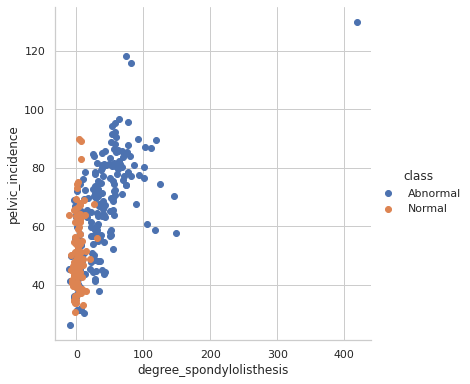

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(Data, hue="class", size=5.5) \
   .map(plt.scatter, "degree_spondylolisthesis", "pelvic_incidence") \
   .add_legend();
plt.show()
# as you can see below we can put a straight line between the red dots and blue dots
# all combinations with "degree_spondylolisthesis" and other variables will be similar


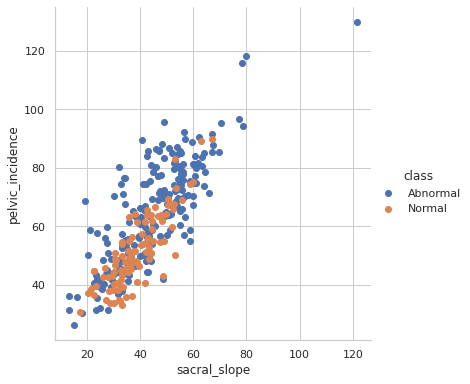

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(Data, hue="class", size=5.5) \
   .map(plt.scatter, "sacral_slope", "pelvic_incidence") \
   .add_legend();
plt.show()
#now it becomes more dificult to seperate the blue and red dots

Lets try pair plotting the data so we can see relationships between multiple variables

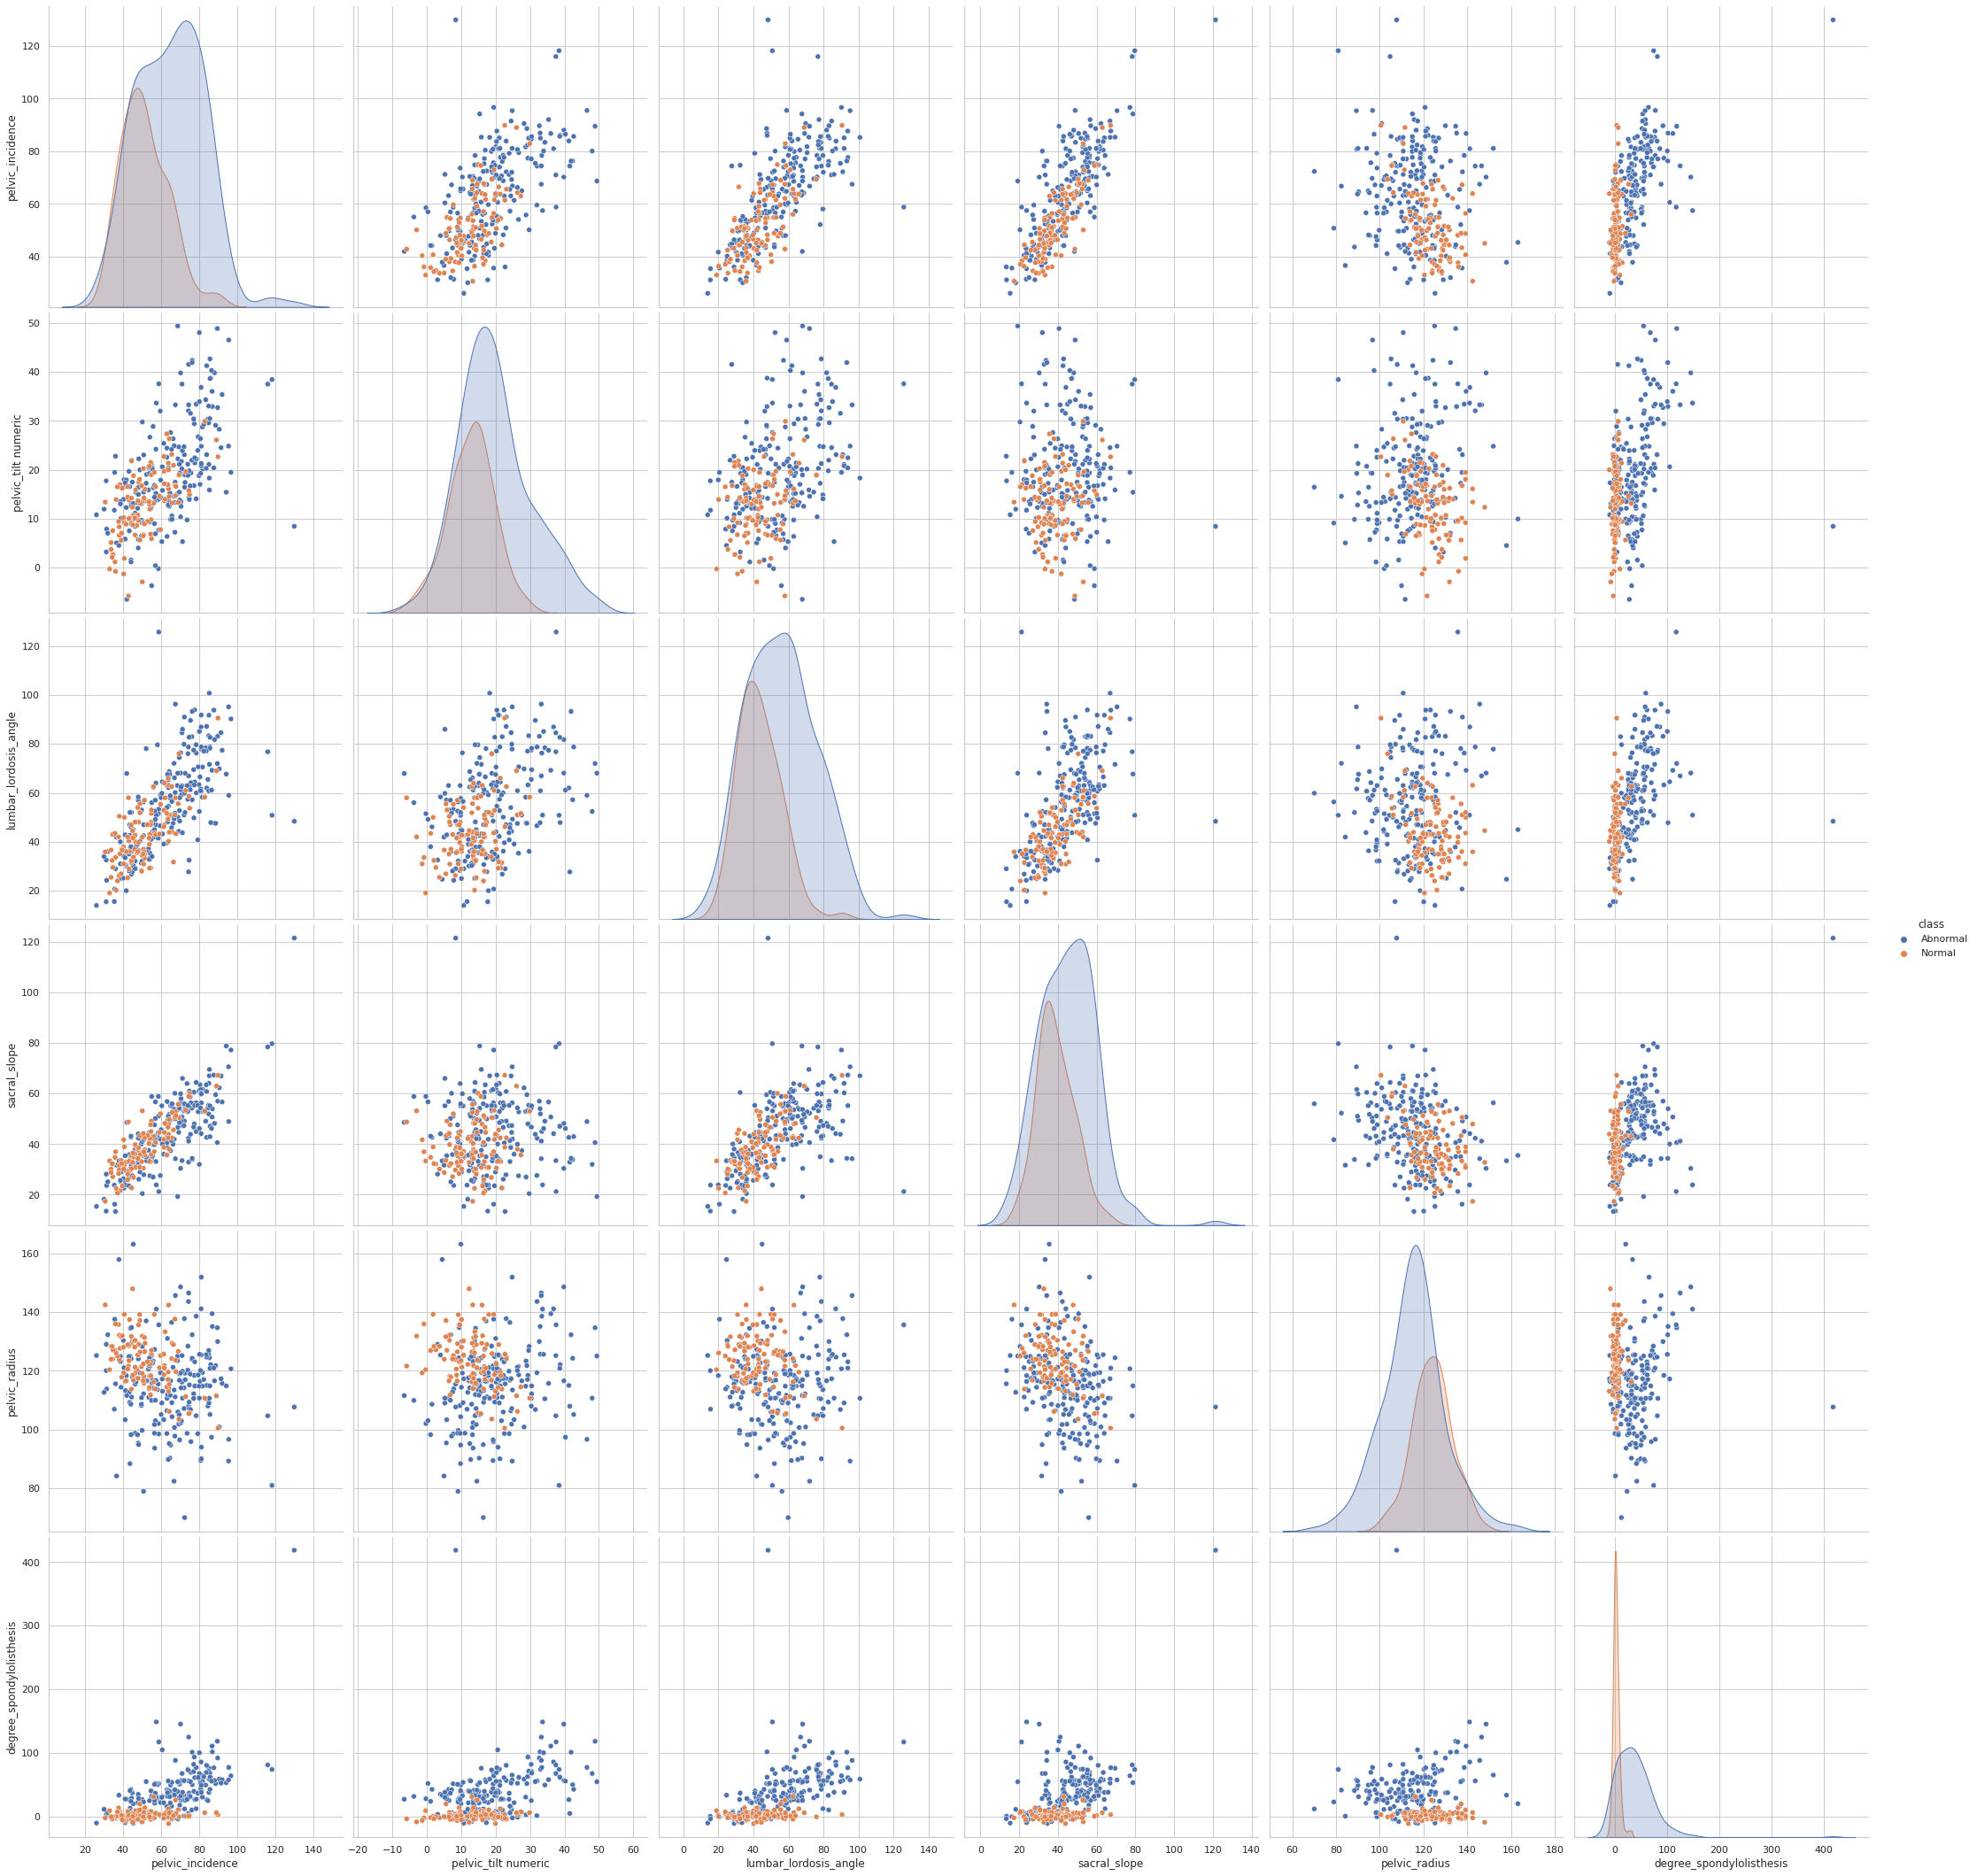

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(Data, hue="class", size=5);
plt.show()
# from the graphs we can say that 'degree_spondylolisthesis' is the best variable to diferenciate normal from abnormal

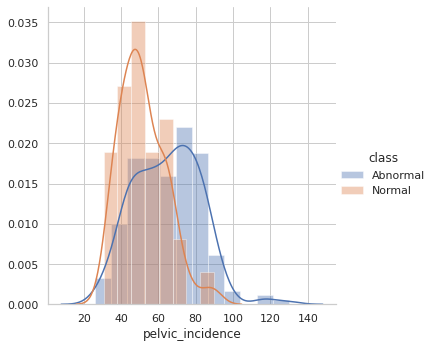

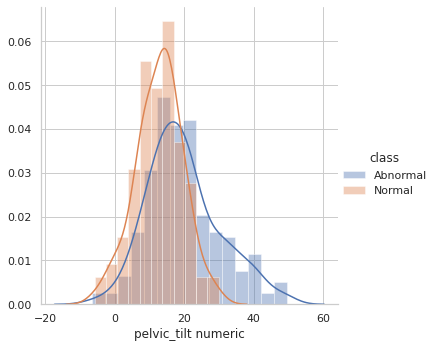

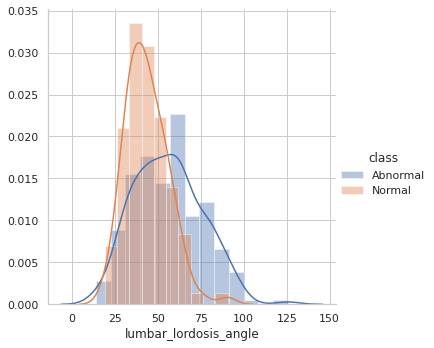

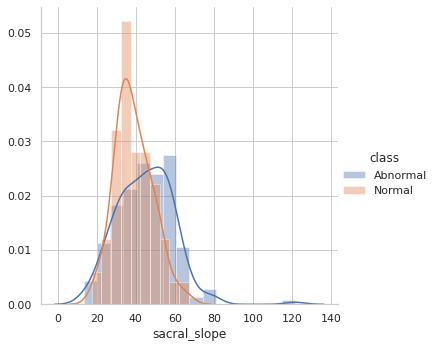

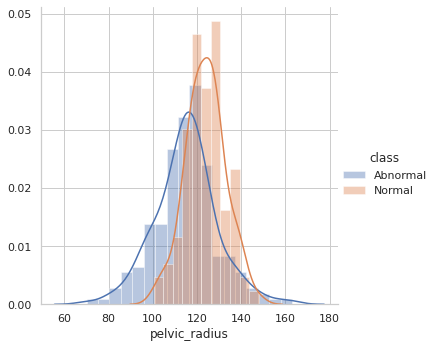

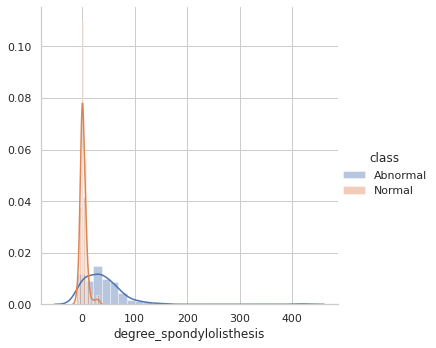

In [ ]:
for name in Data.columns.values[:-1]:
    sns.FacetGrid(Data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

on almost all the variables there is overlaping of normal class and abnormal except "degree_spondylolisthesis

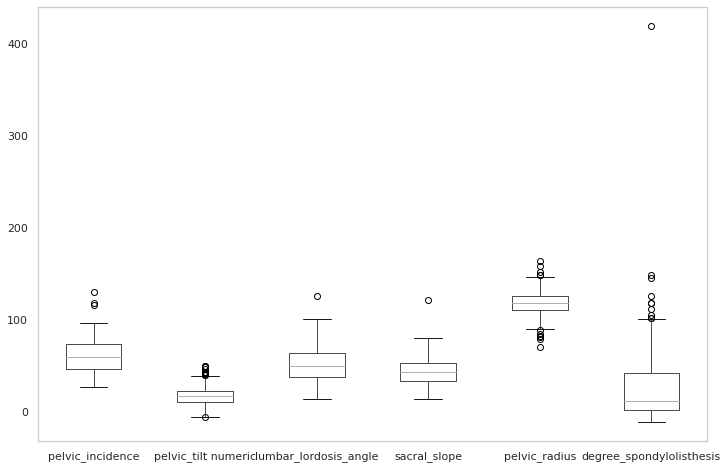

In [ ]:
Data.boxplot(column= ['pelvic_incidence',	'pelvic_tilt numeric',	'lumbar_lordosis_angle',	'sacral_slope',	'pelvic_radius',	'degree_spondylolisthesis'],figsize=(12,8),grid = False)

In [ ]:
Obj = Data.select_dtypes(include='object')
Obj.head() # column type:object only 1 column:class

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [ ]:
data_num = Data.select_dtypes(include=['float64','int64'])
data_num.head() # columns with numerical values : 6 columns


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [ ]:
Data['class'].value_counts() # the data is not  balanced

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'Class distribution')

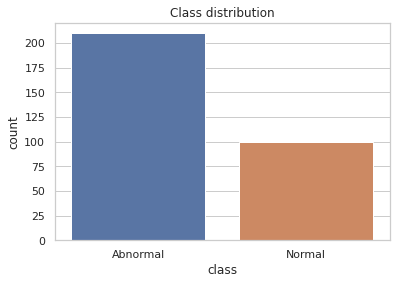

In [ ]:
sns.countplot('class',data = Data)
plt.title("Class distribution") # abnormal is 50% more than normal

In [ ]:
Data.corr() # how strongly the variables are related

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


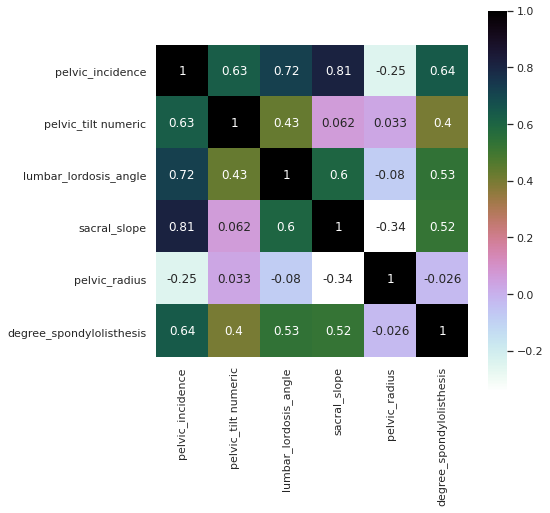

In [ ]:
# the heatmap will give us a better idea
plt.figure(figsize=(7,7))
sns.heatmap(Data.corr(), annot=True, cmap='cubehelix_r',square=True) 
plt.show() 
# 'pelvic_incidence has a strong correlation with most of the variables

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.20,random_state = 1)

In [ ]:
train_x = train.drop(['class'], axis = 1)
train_y = train['class']             

test_x = test.drop(['class'],axis = 1)
test_y = test['class']

In [ ]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = KNN.predict(test_x)
pred

array(['Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = KNN.predict(test_x)
pred

array(['Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=5 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=5 is 83.87%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
pred = KNN.predict(test_x)
pred

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=10 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=10 is 83.87%


In [ ]:
train_accuracy = []
test_accuracy = []

for k in range(1,21):                                 # K from 1 to 20
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)

    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_pred,train_y)  #Train accuracy
    train_accuracy.append(train_score)
    

    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_pred,test_y)     #test accuracy
    test_accuracy.append(test_score)  
    


print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8548387096774194 with K = 1


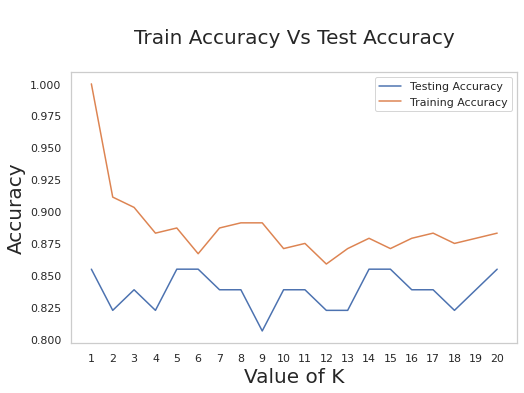

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(range(1,21), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,21), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=20)
plt.xlabel('Value of K',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(range(1,21))
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,21,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [ ]:
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 18}
Best score: 0.8626938775510204


In [ ]:
knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 18 is 82.26%


In [ ]:
test = test.reset_index(drop = True)
test["pred_class"] = y_pred
test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Abnormal,Abnormal
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Normal,Abnormal
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Abnormal,Abnormal
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Abnormal,Abnormal
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,Abnormal,Abnormal
...,...,...,...,...,...,...,...,...
57,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,Abnormal,Abnormal
58,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal,Abnormal
59,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,Abnormal,Abnormal
60,63.834982,20.362507,54.552434,43.472475,112.309492,-0.622527,Abnormal,Normal


**Training** **with** **Naive** **Bayes** 

 Convert the data:**'ortho_knnnb.csv'**  into a frequency table

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:

train, test = train_test_split(Data, test_size=0.25,random_state = 1)

train_x = train.drop(['class'], axis = 1)
train_y = train['class'] 

test_x = test.drop(['class'],axis = 1)
test_y = test['class']

print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (232, 6)
Dimension of train_y : (232,)
Dimension of test_x : (78, 6)
Dimension of test_y : (78,)


In [ ]:
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 


Target on train data ['Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 

In [ ]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset is {}%  '.format(round(accuracy_train *100,2)))

accuracy_score on train dataset is 76.29%  


In [ ]:
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal']


In [ ]:
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset is {}%  '.format(round(accuracy_test *100,2)))

accuracy_score on test dataset is 84.62%  


In [ ]:
test =test.reset_index(drop = True)
test['pred_class'] = predict_test
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Abnormal,Abnormal
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Normal,Abnormal
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Abnormal,Abnormal
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Abnormal,Abnormal
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,Abnormal,Abnormal


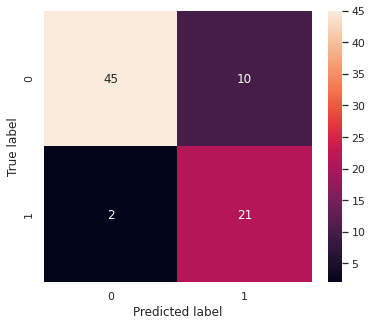

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predict_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
nb_acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(nb_acc*100,2)))
print("*"*70)


**********************************************************************
Correct predictions:  66
False predictions 12
**********************************************************************
Accuracy of the Naive Bayes Clasification is 84.62% 
**********************************************************************


In [ ]:

#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(predict_test,test_y)*100,2)))

The accuracy of the NB is 84.62%


the accuracy level of the NB model is the same as  the KNN model
both algorithm can be used on this dataset

In [ ]:
#predicted_probabilities
model.predict_proba(test_x)[:10]

array([[9.99965967e-01, 3.40332822e-05],
       [5.30062729e-01, 4.69937271e-01],
       [1.00000000e+00, 1.16929648e-16],
       [9.99892357e-01, 1.07642517e-04],
       [9.99994082e-01, 5.91780797e-06],
       [9.99566273e-01, 4.33726654e-04],
       [7.61565117e-03, 9.92384349e-01],
       [1.00000000e+00, 1.51317173e-16],
       [1.00000000e+00, 3.25292808e-26],
       [9.67468176e-01, 3.25318236e-02]])